In [1]:
import sklearn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import scatter_matrix
random_state=42

In [2]:
train = pd.read_csv(r"C:\Users\USER\Desktop\AI\ML Shai\task 9\train.csv")
test  = pd.read_csv(r"C:\Users\USER\Desktop\AI\ML Shai\task 9\test.csv") 

In [3]:
train.head() 

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
train.dtypes

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
train['price'] = train.price.astype(float)
train.dtypes

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

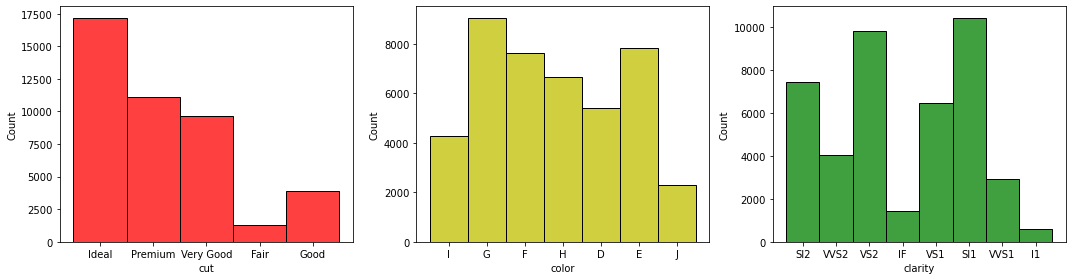

In [8]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.histplot(train['cut'], ax=axes[0] ,color='r')
sns.histplot(train['color'], ax=axes[1] ,color='y')
sns.histplot(train['clarity'], ax=axes[2],color='g')
fig.tight_layout()

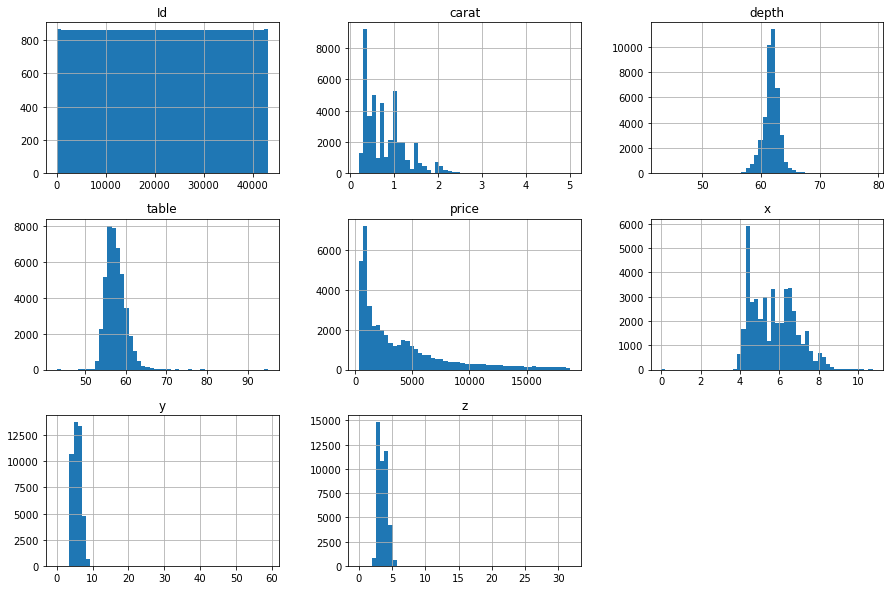

In [9]:
train.hist(bins=50, figsize=(15, 10))
plt.show()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  float64
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.6+ MB


In [11]:
corr_matrix = train.corr()
corr_matrix

,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


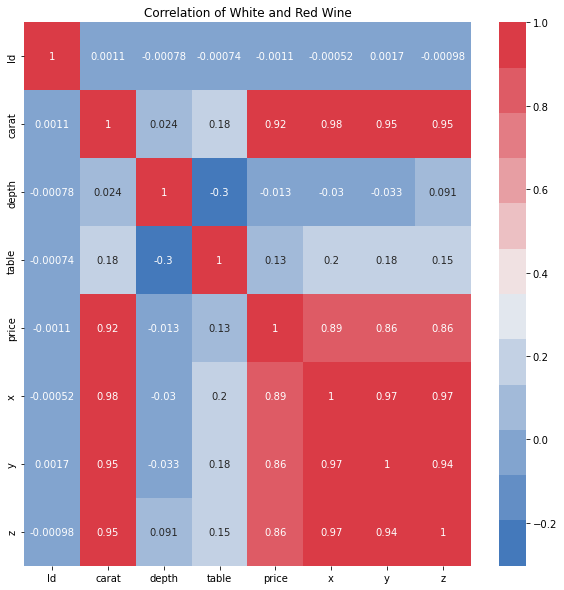

In [12]:
plt.figure(figsize=(10, 10))
df_corr = train.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(250, 10, n=12), annot=True)
plt.title("Correlation of White and Red Wine")
plt.show()

In [13]:
corr_matrix = train.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [14]:
train = train.drop(['depth',],axis=1)
train = train.drop(['Id',],axis=1)
test = test.drop(['depth',],axis=1)

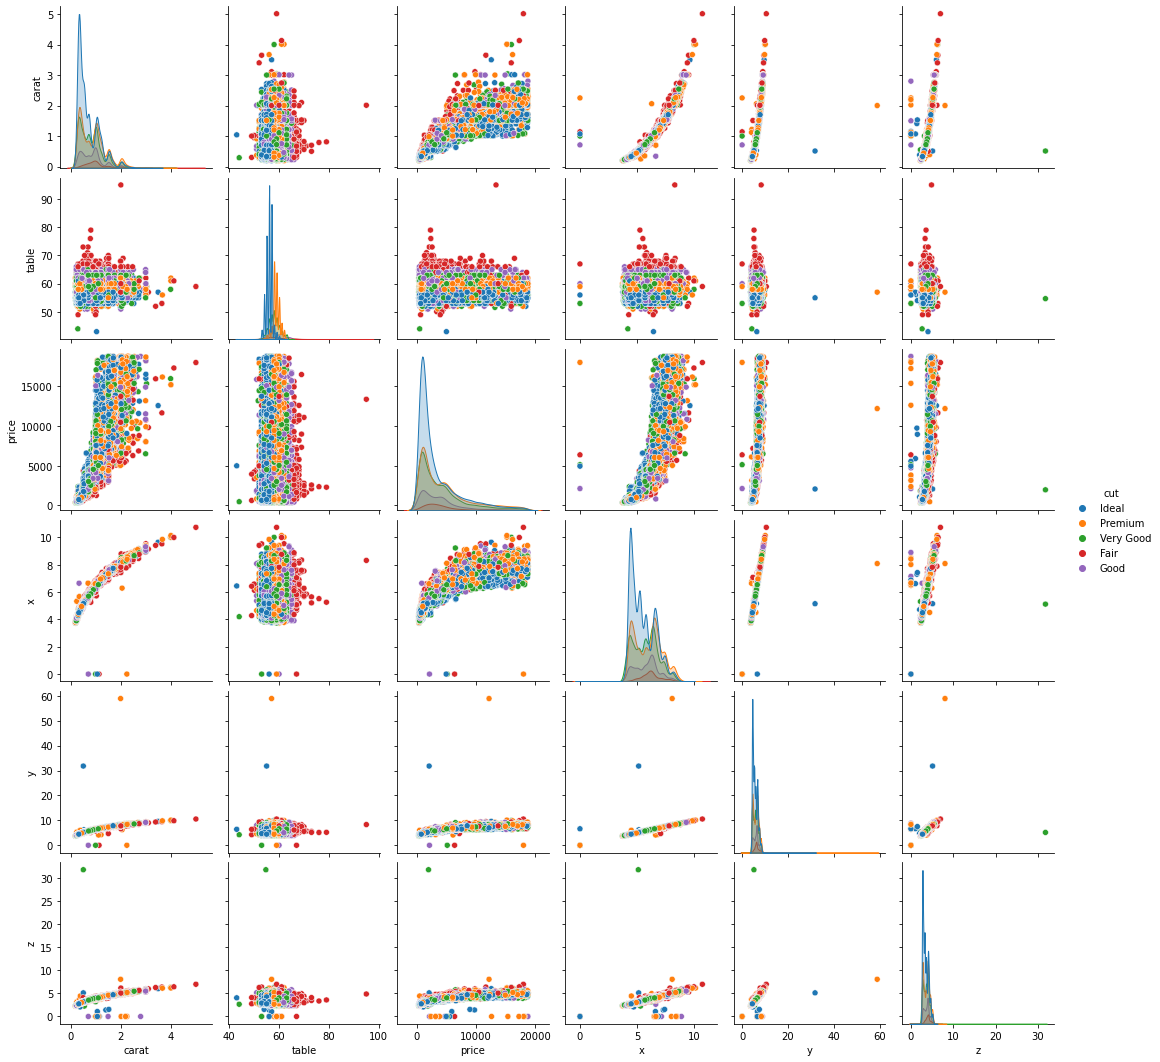

In [15]:
sns.pairplot(train, hue="cut")

In [16]:
train.drop(train[train["price"]> 15000].index, inplace=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

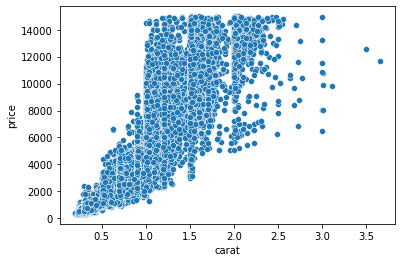

In [17]:
sns.scatterplot(x=train["carat"], y = train["price"])

In [18]:
train.drop(train[train["carat"]> 3].index, inplace=True)

<AxesSubplot:xlabel='table', ylabel='price'>

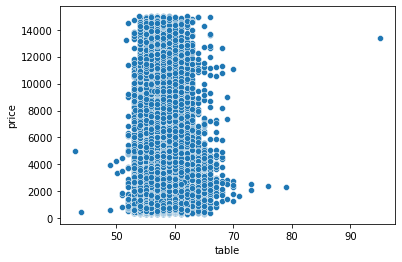

In [19]:
sns.scatterplot(x=train["table"], y = train["price"])

In [20]:
train.drop(train[train["table"]> 80].index, inplace=True)
train.drop(train[train["table"]< 50].index, inplace=True)

<AxesSubplot:xlabel='x', ylabel='price'>

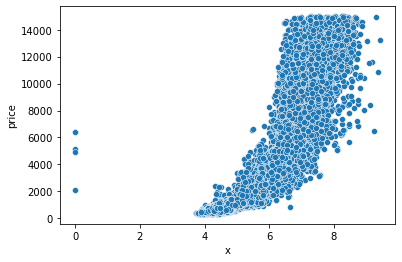

In [21]:
sns.scatterplot(x=train["x"], y = train["price"])

In [22]:
train.drop(train[train["x"]< 2].index, inplace=True)

<AxesSubplot:xlabel='y', ylabel='price'>

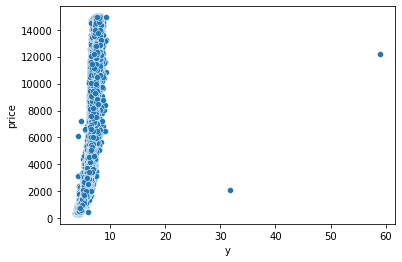

In [23]:
sns.scatterplot(x=train["y"], y = train["price"])

In [24]:
train.drop(train[train["y"]> 20].index, inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

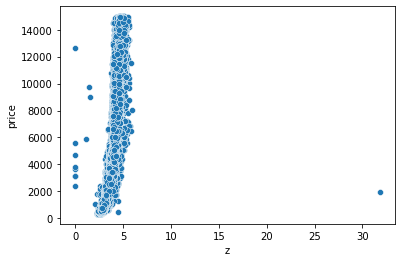

In [25]:
sns.scatterplot(train["z"], y = train["price"])

In [26]:
train.drop(train[train["z"]> 20].index, inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

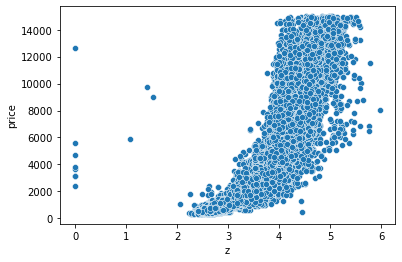

In [27]:
sns.scatterplot(train["z"], y = train["price"])

In [28]:
train.drop(train[train["z"]< 2].index, inplace=True)

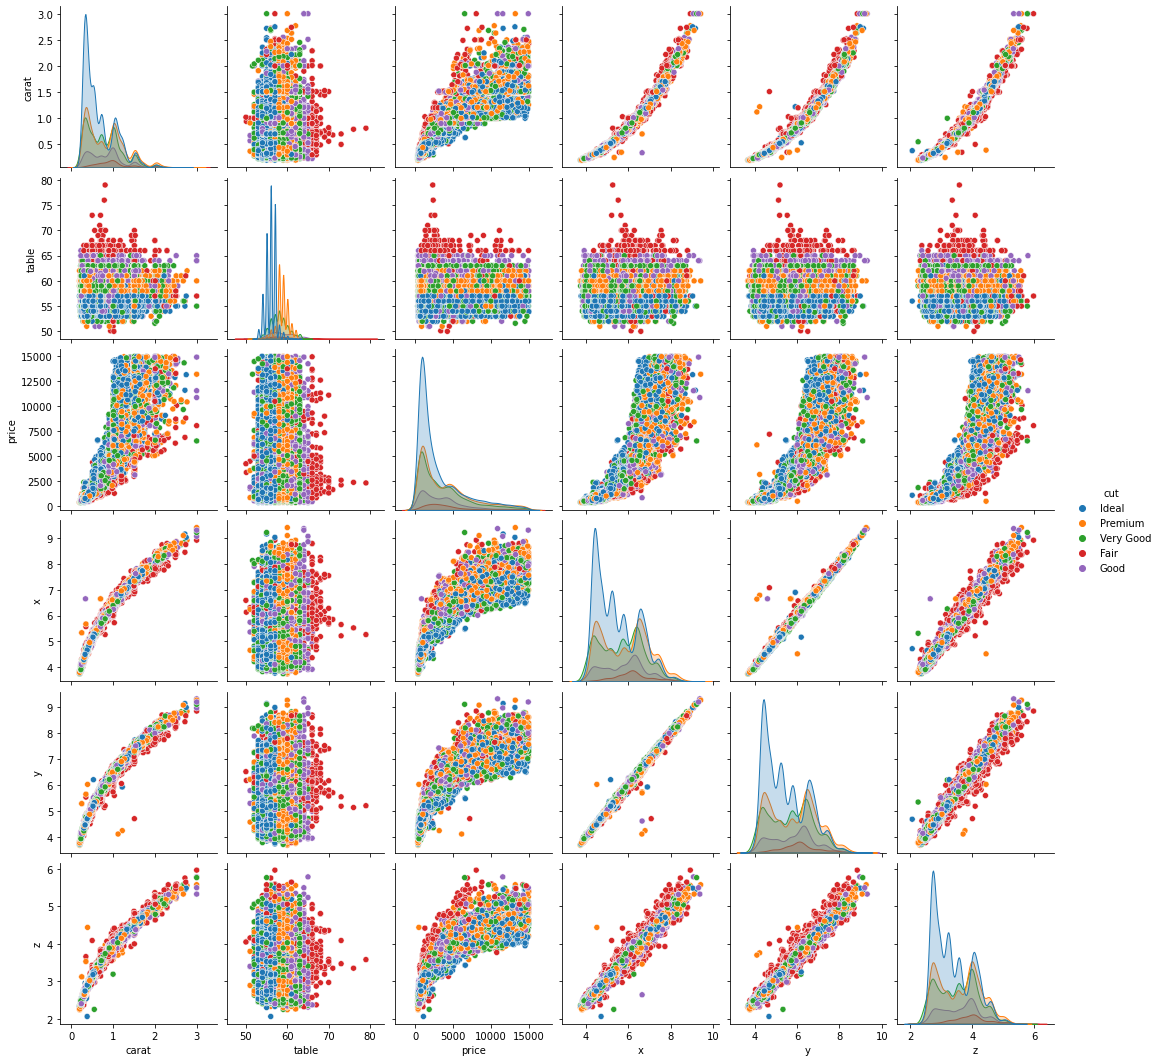

In [29]:
sns.pairplot(train, hue="cut")

In [30]:
train['volume']= train.x * train.y * train.z
train = train.drop(['x','y','z'], axis=1)

test['volume'] = test.x * test.y * test.z
test = test.drop(['x','y','z'], axis=1)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='volume', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='volume'>,
        <AxesSubplot:xlabel='volume', ylabel='volume'>]], dtype=object)

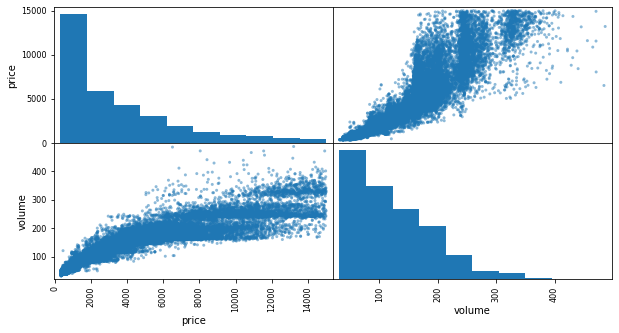

In [31]:
attributes = ["price", "volume"]
scatter_matrix(train[attributes], figsize=(10, 5))

In [32]:
x = train.drop(columns='price')
y = train['price']

In [33]:
print('cut : ',x['cut'].unique())
print('color : ',x['color'].unique())
print('clarity : ',x['clarity'].unique())

cut :  ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
color :  ['I' 'F' 'G' 'H' 'D' 'E' 'J']
clarity :  ['SI2' 'VS2' 'VVS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


In [34]:
cut_class_dict = {'Ideal':1,'Premium':2,'Very Good':3,'Fair':4,'Good':5}
color_dict     = {'I':1,'F':2,'G':3,'H':4,'D':5,'E':6,'J':7}
clarity_dict   = {'SI2':1,'VS2':2,'VVS2':3,'IF':4,'VS1':5,'SI1':6,'VVS1':7,'I1':8}

In [35]:
x['cut']      =x['cut'].map(cut_class_dict)
x['clarity']  =x['clarity'].map(clarity_dict)
x['color']    =x['color'].map(color_dict)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diamonds_prepared = scaler.fit_transform(x)

In [37]:
x

,carat,cut,color,clarity,table,volume
0,1.06,1,1,1,57.0,176.483340
2,0.32,1,2,2,56.0,52.943373
3,0.53,1,3,2,56.0,86.422842
4,0.70,2,4,3,57.0,115.315200
5,0.90,3,3,4,58.0,145.652094
...,...,...,...,...,...,...
43147,0.52,1,6,2,56.0,84.997584
43148,0.72,3,5,2,59.0,115.946550
43149,0.44,2,1,7,58.0,72.801630
43150,0.31,2,6,5,58.0,51.419010


In [38]:
sklearn.utils.shuffle(diamonds_prepared)
X_train, X_val, y_train, y_val = train_test_split(diamonds_prepared,y,train_size=0.8,random_state=42)

In [39]:
print(X_train.shape, X_val.shape)

(33447, 6) (8362, 6)


In [40]:
def Train_for_best_accuracy():
  global r_squared,X_val,y_val,z,clf

  clf = RandomForestRegressor()
  clf.fit(X_train,y_train)
  r_squared = clf.score(X_val,y_val)
  print(r_squared)
  if r_squared < 0.85:
    z += 1
    Train_for_best_accuracy()

In [41]:
z = 0
Train_for_best_accuracy()

0.9810822270311115


In [42]:
for x,y in list(zip(X_val,y_val))[:10]:
  print(clf.predict([x])[0],'\t',y)

2451.86 	 2367.0
9020.9 	 8669.0
5205.916666666667 	 6327.0
1923.1623571428572 	 2197.0
390.66 	 367.0
885.96 	 886.0
996.97 	 827.0
1289.14 	 1378.0
4512.746666666667 	 4234.0
446.694 	 480.0


In [43]:
pred_train = clf.predict(X_train)
r2_train = r2_score(pred_train, y_train)*100
mse_train = mean_squared_error(pred_train, y_train, squared = False)
rmse_train = np.sqrt(mse_train)
print("**** Training *****")
print("R2: ", r2_train)
print("RMSE: ", rmse_train)

**** Training *****
R2:  99.71840729211718
RMSE:  13.233388521408381


In [44]:
pred_validation = clf.predict(X_val)
r2_val = r2_score(pred_validation, y_val)*100
mse_val = mean_squared_error(pred_validation, y_val, squared = False)
rmse_val = np.sqrt(mse_val)
print("\n**** Validataion ****")
print("R2: ", r2_val)
print("RMSE: ", rmse_val)


**** Validataion ****
R2:  98.07147574850514
RMSE:  21.34054572938584


In [45]:
print('cut : ',test['cut'].unique())
print('color : ',test['color'].unique())
print('clarity : ',test['clarity'].unique())

cut :  ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
color :  ['G' 'E' 'I' 'F' 'D' 'H' 'J']
clarity :  ['VVS2' 'VS2' 'VS1' 'SI2' 'VVS1' 'SI1' 'IF' 'I1']


In [46]:
test['cut']      =test['cut'].map(cut_class_dict)
test['clarity']  =test['clarity'].map(clarity_dict)
test['color']    =test['color'].map(color_dict)

In [47]:
id = test['Id']
test = test.drop(['Id',],axis=1)

In [48]:
diamonds_prepared_test = scaler.fit_transform(test)

In [49]:
test.head()

,carat,cut,color,clarity,table,volume
0,0.34,1,3,3,57.0,55.686400
1,0.71,2,6,2,58.0,116.719456
2,0.44,3,1,5,56.0,71.889720
3,0.81,2,6,1,59.0,134.037855
4,0.40,1,3,7,56.0,66.435840


In [50]:
y_pred = clf.predict(diamonds_prepared_test)

In [51]:
data={'Id': id, 'price':y_pred }
sub = pd.DataFrame(data=data)
sub.to_csv('sub3.csv',index=False)